In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import joblib

In [2]:
df = pd.read_csv("../data/dataset_raw.csv")

In [32]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


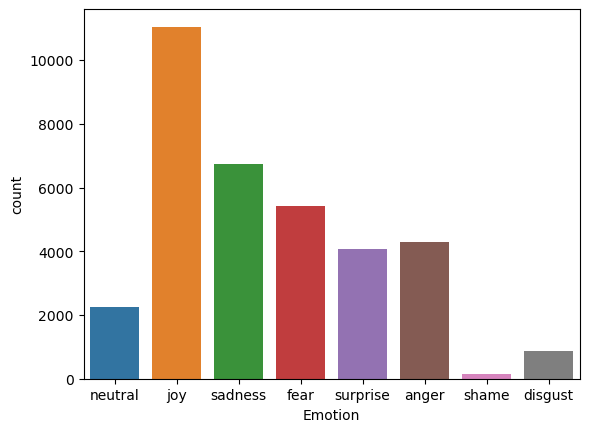

In [33]:
sns.countplot(x="Emotion", data=df)

In [3]:
df["Cleaned_Text"] = df["Text"]

In [35]:
df.head()

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
X = df["Cleaned_Text"]
y = df["Emotion"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
vc = TfidfVectorizer(stop_words="english")
X_train_vc = vc.fit_transform(X_train)
X_test_vc = vc.transform(X_test)

In [39]:
lr_model = LogisticRegression()
lr_model.fit(X_train_vc, y_train)

test_pred = lr_model.predict(X_test_vc)
print(classification_report(y_test, test_pred))

/home/grim-reaper/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       anger       0.64      0.53      0.58      1283
     disgust       0.72      0.04      0.08       292
        fear       0.76      0.64      0.69      1645
         joy       0.56      0.83      0.67      3311
     neutral       0.65      0.31      0.42       675
     sadness       0.59      0.57      0.58      2015
       shame       0.69      0.25      0.37        36
    surprise       0.61      0.39      0.48      1181

    accuracy                           0.61     10438
   macro avg       0.65      0.45      0.48     10438
weighted avg       0.62      0.61      0.59     10438



In [40]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_vc, y_train)

test_pred = knn_model.predict(X_test_vc)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

       anger       0.58      0.04      0.07      1283
     disgust       0.50      0.00      0.01       292
        fear       0.87      0.14      0.24      1645
         joy       0.73      0.08      0.15      3311
     neutral       0.06      0.91      0.12       675
     sadness       0.73      0.06      0.11      2015
       shame       1.00      0.06      0.11        36
    surprise       0.65      0.01      0.02      1181

    accuracy                           0.12     10438
   macro avg       0.64      0.16      0.10     10438
weighted avg       0.68      0.12      0.12     10438



In [41]:
svc_model = SVC()
svc_model.fit(X_train_vc, y_train)

test_pred = svc_model.predict(X_test_vc)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.51      0.60      1283
     disgust       0.90      0.03      0.06       292
        fear       0.84      0.63      0.72      1645
         joy       0.54      0.89      0.67      3311
     neutral       0.88      0.55      0.67       675
     sadness       0.61      0.56      0.58      2015
       shame       0.77      0.47      0.59        36
    surprise       0.73      0.34      0.46      1181

    accuracy                           0.63     10438
   macro avg       0.75      0.50      0.54     10438
weighted avg       0.68      0.63      0.61     10438



In [42]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vc, y_train)

test_pred = rf_model.predict(X_test_vc)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.52      0.58      1283
     disgust       0.80      0.13      0.23       292
        fear       0.85      0.62      0.72      1645
         joy       0.56      0.84      0.67      3311
     neutral       0.50      0.72      0.59       675
     sadness       0.60      0.52      0.55      2015
       shame       0.85      0.92      0.88        36
    surprise       0.69      0.32      0.44      1181

    accuracy                           0.62     10438
   macro avg       0.69      0.57      0.58     10438
weighted avg       0.65      0.62      0.60     10438



In [43]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vc, y_train)

test_pred = nb_model.predict(X_test_vc)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

       anger       0.89      0.26      0.40      1283
     disgust       0.00      0.00      0.00       292
        fear       0.86      0.43      0.58      1645
         joy       0.42      0.96      0.58      3311
     neutral       0.94      0.07      0.13       675
     sadness       0.64      0.40      0.49      2015
       shame       0.00      0.00      0.00        36
    surprise       0.83      0.17      0.29      1181

    accuracy                           0.51     10438
   macro avg       0.57      0.29      0.31     10438
weighted avg       0.65      0.51      0.46     10438



/home/grim-reaper/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grim-reaper/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grim-reaper/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
pipe = Pipeline([["vc", TfidfVectorizer()], ["svc", SVC(probability=True)]])
pipe.fit(X, y)

Pipeline(steps=[('vc', TfidfVectorizer()), ['svc', SVC(probability=True)]])

In [8]:
pipe.predict(["I am happy"])

array(['joy'], dtype=object)

In [9]:
joblib.dump(pipe, "final_model.pkl")

['final_model.pkl']